<a href="https://colab.research.google.com/github/nightitachi/Natural-Language-Processing-with-Disaster-Tweets/blob/main/Natural_Language_Processing_with_Disaster_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opendatasets

# Import Libraries

In [ ]:
import opendatasets as od

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
od.download('https://www.kaggle.com/competitions/nlp-getting-started/data?select=train.csv')
od.download('https://www.kaggle.com/competitions/nlp-getting-started/data?select=test.csv')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alibelhrak
Your Kaggle Key: ··········


100%|██████████| 593k/593k [00:00<00:00, 35.9MB/s]


Extracting archive ./nlp-getting-started/nlp-getting-started.zip to ./nlp-getting-started
Skipping, found downloaded files in "./nlp-getting-started" (use force=True to force download)


In [ ]:
train = pd.read_csv('/content/nlp-getting-started/train.csv')
test = pd.read_csv('/content/nlp-getting-started/test.csv')

In [ ]:
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [ ]:
 train.shape


(7613, 5)

In [ ]:
test.shape

(3263, 4)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [ ]:
train.isnull().sum()

,0
id,0
keyword,61
location,2533
text,0
target,0


In [ ]:
train['keyword'].value_counts()

,count
keyword,
fatalities,45
deluge,42
armageddon,42
sinking,41
damage,41
...,...
forest%20fire,19
epicentre,12
threat,11


# Preprocessing The Data

In [ ]:
texted_data = train['text']

import re
texted_data = texted_data.apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
texted_data

,text
0,Our Deeds are the Reason of this earthquake Ma...
1,Forest fire near La Ronge Sask Canada
2,All residents asked to shelter in place are be...
3,people receive wildfires evacuation orders in...
4,Just got sent this photo from Ruby Alaska as s...
...,...
7608,Two giant cranes holding a bridge collapse int...
7609,ariaahrary TheTawniest The out of control wild...
7610,M UTCkm S of Volcano Hawaii httptcozDtoydEbJ
7611,Police investigating after an ebike collided w...


In [ ]:
import re

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, RegexpParser
nltk.download('punkt', force=True)
nltk.download('stopwords', force=True)
nltk.download('averaged_perceptron_tagger', force=True)
nltk.download('wordnet', force=True)
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:

def preprocessing_text(text):
    text = text.lower()

    text = re.sub(r'[^a-zA-Z\s]', '', text)

    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))

    tokens = [word for word in tokens if word not in stop_words]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return tokens




In [ ]:
train['Processed'] = texted_data.apply(preprocessing_text)
train['Processed_text'] = [' '.join(tokens) for tokens in train['Processed']]

In [ ]:
train['Processed'][0]

['deed', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'u']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(train['Processed_text'])

In [ ]:
y = train['target']

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(X, y , test_size=.2 )

In [ ]:
model = SGDClassifier()
model.fit(x_train , y_train)

SGDClassifier()

In [ ]:
predicted = model.predict(x_test)

In [ ]:
from sklearn.metrics  import  confusion_matrix , classification_report
cm = confusion_matrix(y_test , predicted)
cm

array([[727, 123],
       [193, 480]])

Text(50.722222222222214, 0.5, 'True Targets')

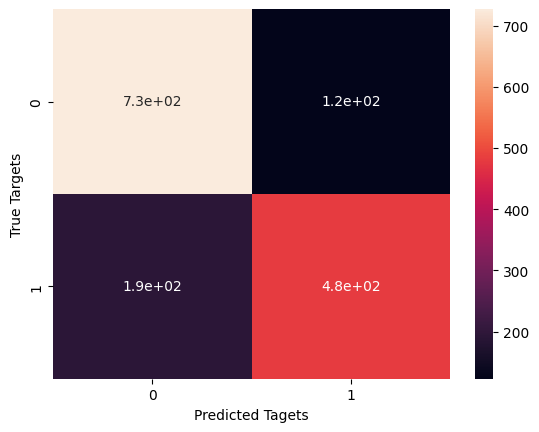

In [ ]:
sns.heatmap(cm  ,annot = True )
plt.xlabel('Predicted Tagets')
plt.ylabel('True Targets')